In [1]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [7]:
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

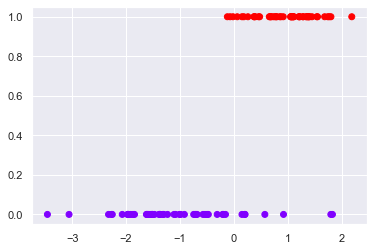

In [8]:
plt.scatter(x, y, c=y, cmap='rainbow')

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [10]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [11]:
print(lr.coef_)
print(lr.intercept_)

[[2.0956163]]
[-0.09392354]


In [12]:
y_pred = lr.predict(x_test)

In [13]:
confusion_matrix(y_test, y_pred)

array([[15,  3],
       [ 1, 14]], dtype=int64)

In [14]:
lr.predict_proba(x_test)

array([[0.10881121, 0.89118879],
       [0.09896981, 0.90103019],
       [0.9882725 , 0.0117275 ],
       [0.41863718, 0.58136282],
       [0.44621478, 0.55378522],
       [0.94374471, 0.05625529],
       [0.93552768, 0.06447232],
       [0.08020543, 0.91979457],
       [0.99850008, 0.00149992],
       [0.95146092, 0.04853908],
       [0.58705394, 0.41294606],
       [0.98505711, 0.01494289],
       [0.96335461, 0.03664539],
       [0.09657191, 0.90342809],
       [0.0314821 , 0.9685179 ],
       [0.21217176, 0.78782824],
       [0.05882704, 0.94117296],
       [0.97055734, 0.02944266],
       [0.0234375 , 0.9765625 ],
       [0.13956967, 0.86043033],
       [0.10552083, 0.89447917],
       [0.04105266, 0.95894734],
       [0.05649718, 0.94350282],
       [0.02483515, 0.97516485],
       [0.82148965, 0.17851035],
       [0.42815545, 0.57184455],
       [0.91855699, 0.08144301],
       [0.96014588, 0.03985412],
       [0.32431727, 0.67568273],
       [0.78535385, 0.21464615],
       [0.

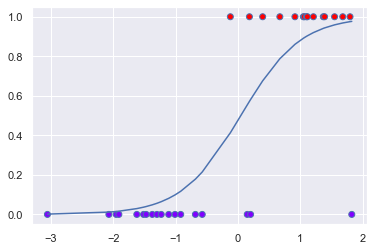

In [15]:
df = pd.DataFrame({'x': x_test[:,0], 'y': y_test})
df = df.sort_values(by='x')
from scipy.special import expit
sigmoid_function = expit(df['x'] * lr.coef_[0][0] + lr.intercept_[0]).ravel()
plt.plot(df['x'], sigmoid_function)
plt.scatter(df['x'], df['y'], c=df['y'], cmap='rainbow', edgecolors='b')

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()

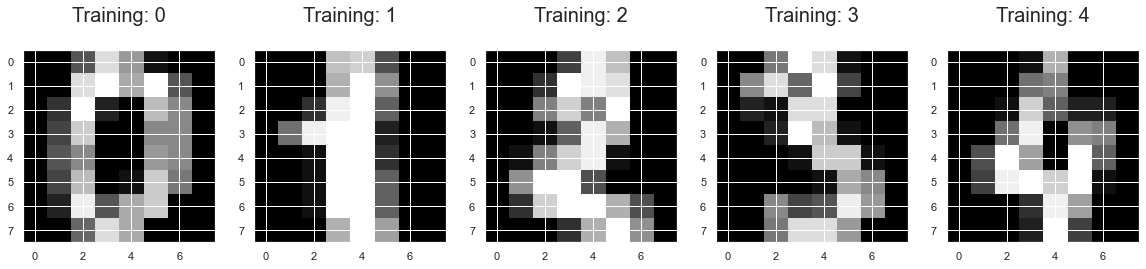

In [17]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [19]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

e:\python\install\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
predictions = logisticRegr.predict(x_test)

In [21]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


In [22]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]
